In [499]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
import re

from scipy import stats
from scipy.stats import norm, skew
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [500]:
train_df = pd.read_csv('../data/train/FIFA_train.csv')
test_df = pd.read_csv('../data/test/FIFA_test.csv')

In [501]:
train_df.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [502]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [503]:
train_df.describe(include='all')

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
count,8932.000000,8932,8932.000000,8932,8932,8932,8932,8932.000000,8932.000000,8932.000000,8932.000000,8.932000e+03
unique,NaN,8932,NaN,5,17,4,2,NaN,NaN,NaN,NaN,NaN
top,NaN,M. Curado,NaN,europe,2019,MF,right,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,5322,2366,3428,6837,NaN,NaN,NaN,NaN,NaN
mean,7966.775750,NaN,25.209136,NaN,NaN,NaN,NaN,1.130878,67.091133,71.997201,2.401702,2.778673e+06
std,4844.428521,NaN,4.635515,NaN,NaN,NaN,NaN,0.423792,6.854910,5.988147,0.776048,5.840982e+06
min,0.000000,NaN,16.000000,NaN,NaN,NaN,NaN,1.000000,47.000000,48.000000,1.000000,1.000000e+04
25%,3751.750000,NaN,21.000000,NaN,NaN,NaN,NaN,1.000000,63.000000,68.000000,2.000000,3.750000e+05
50%,7696.500000,NaN,25.000000,NaN,NaN,NaN,NaN,1.000000,67.000000,72.000000,2.000000,8.250000e+05
75%,12082.250000,NaN,28.000000,NaN,NaN,NaN,NaN,1.000000,72.000000,76.000000,3.000000,2.600000e+06


In [504]:
test_df.head(5)

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [505]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3828 non-null   int64  
 1   name              3828 non-null   object 
 2   age               3828 non-null   int64  
 3   continent         3828 non-null   object 
 4   contract_until    3828 non-null   object 
 5   position          3828 non-null   object 
 6   prefer_foot       3828 non-null   object 
 7   reputation        3828 non-null   float64
 8   stat_overall      3828 non-null   int64  
 9   stat_potential    3828 non-null   int64  
 10  stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 329.1+ KB


In [506]:
test_df.describe(include='all')

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
count,3828.000000,3828,3828.000000,3828,3828,3828,3828,3828.000000,3828.000000,3828.000000,3828.000000
unique,NaN,3828,NaN,5,18,4,2,NaN,NaN,NaN,NaN
top,NaN,R. Massimo,NaN,europe,2021,MF,right,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,2269,985,1431,2915,NaN,NaN,NaN,NaN
mean,7846.258098,NaN,25.297806,NaN,NaN,NaN,NaN,1.143939,67.336991,72.107628,2.414838
std,4870.339361,NaN,4.628236,NaN,NaN,NaN,NaN,0.448465,6.908814,6.133428,0.781153
min,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,1.000000,47.000000,52.000000,1.000000
25%,3466.250000,NaN,22.000000,NaN,NaN,NaN,NaN,1.000000,63.000000,68.000000,2.000000
50%,7643.500000,NaN,25.000000,NaN,NaN,NaN,NaN,1.000000,67.000000,72.000000,2.000000
75%,11967.000000,NaN,29.000000,NaN,NaN,NaN,NaN,1.000000,72.000000,76.000000,3.000000


In [507]:
print('train_df Before : ', train_df.shape)
print('test_df Before : ', test_df.shape)

train_df Before :  (8932, 12)
test_df Before :  (3828, 11)


In [508]:
train_ID = train_df['id']
test_ID = test_df['id']

In [509]:
train_df.drop(['id', 'name'], axis=1, inplace=True)
test_df.drop(['id', 'name'], axis=1, inplace=True)

In [510]:
print('train_df After : ', train_df.shape)
print('test_df After : ', test_df.shape)

train_df After :  (8932, 10)
test_df After :  (3828, 9)


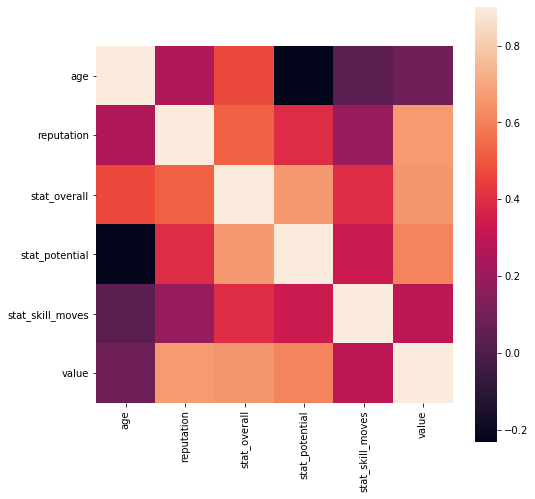

In [511]:
corrmat = train_df.corr()
plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=0.9, square=True)

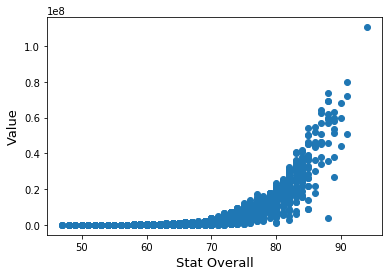

In [512]:
fig, ax = plt.subplots()

ax.scatter(x=train_df['stat_overall'], y=train_df['value'])
plt.xlabel('Stat Overall', fontSize=13)
plt.ylabel('Value', fontSize=13)

plt.show()

In [513]:
train_df = train_df.drop(train_df[(train_df['stat_overall'] > 87) & (train_df['value'] < 20000000)].index)
train_df = train_df.drop(train_df[(train_df['stat_overall'] >= 94)].index)

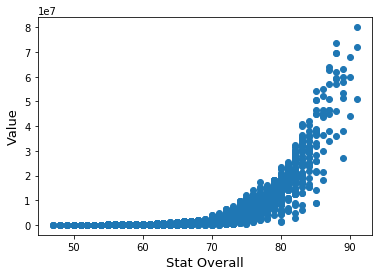

In [514]:
# outlier definition / remove outlier 
fig, ax = plt.subplots()

ax.scatter(x=train_df['stat_overall'], y=train_df['value'])
plt.xlabel('Stat Overall', fontSize=13)
plt.ylabel('Value', fontSize=13)

plt.show()

In [515]:
train_df['contract_until'].unique()

array(['2020', '2021', '2019', '2023', '2022', '2024', 'Jun 30, 2019',
       '2026', 'Dec 31, 2018', '2018', '2025', 'Jun 30, 2020',
       'May 31, 2020', 'May 31, 2019', 'Jan 31, 2019', 'Jan 1, 2019',
       'Jan 12, 2019'], dtype=object)

In [516]:
clear_contract_until = []
currentYear = datetime.now().year - 3

for c in train_df['contract_until']:
    c = int(c[-4:])
    c = c - currentYear 
    
    clear_contract_until.append(c)
    
train_df['contract_remain'] = clear_contract_until
train_df.drop('contract_until', axis=1, inplace=True)

In [517]:
train_df.head(5)

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_remain
1,27,europe,GK,right,4.0,91,93,1.0,72000000.0,2
2,31,south america,ST,right,5.0,91,91,3.0,80000000.0,3
3,32,europe,DF,right,4.0,91,91,3.0,51000000.0,2
4,25,europe,GK,right,3.0,90,93,1.0,68000000.0,3
5,32,south america,DF,right,3.0,90,90,2.0,44000000.0,1


In [518]:
clear_contract_until = []
currentYear = datetime.now().year - 3

for c in test_df['contract_until']:
    c = int(c[-4:])
    c = c - currentYear 
    
    clear_contract_until.append(c)
    
test_df['contract_remain'] = clear_contract_until
test_df.drop('contract_until', axis=1, inplace=True)

In [519]:
test_df.head(5)

,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,contract_remain
0,33,europe,ST,right,5.0,94,94,5.0,4
1,26,south america,ST,right,5.0,92,93,5.0,4
2,27,europe,MF,right,4.0,91,92,4.0,5
3,27,europe,ST,right,4.0,91,91,4.0,2
4,32,europe,MF,right,4.0,91,91,4.0,2


In [520]:
continent_list = []

for c in train_df['continent']:
    if c == 'asia' or c == 'oceania':
        c = 'asia/oceania'
        continent_list.append(c)
    else:
        continent_list.append(c)

train_df['continent_merge'] = continent_list
train_df.drop('continent', axis=1, inplace=True)

In [521]:
continent_list = []

for c in test_df['continent']:
    if c == 'asia' or c == 'oceania':
        c = 'asia/oceania'
        continent_list.append(c)
    else:
        continent_list.append(c)

test_df['continent_merge'] = continent_list
test_df.drop('continent', axis=1, inplace=True)

In [522]:
train_df = pd.get_dummies(columns = ['continent_merge', 'position', 'prefer_foot'], data = train_df)
test_df = pd.get_dummies(columns = ['continent_merge', 'position', 'prefer_foot'], data = test_df)

In [523]:
train_df.head(5)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,value,contract_remain,continent_merge_africa,continent_merge_asia/oceania,continent_merge_europe,continent_merge_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
1,27,4.0,91,93,1.0,72000000.0,2,0,0,1,0,0,1,0,0,0,1
2,31,5.0,91,91,3.0,80000000.0,3,0,0,0,1,0,0,0,1,0,1
3,32,4.0,91,91,3.0,51000000.0,2,0,0,1,0,1,0,0,0,0,1
4,25,3.0,90,93,1.0,68000000.0,3,0,0,1,0,0,1,0,0,0,1
5,32,3.0,90,90,2.0,44000000.0,1,0,0,0,1,1,0,0,0,0,1


In [524]:
test_df.head(5)

,age,reputation,stat_overall,stat_potential,stat_skill_moves,contract_remain,continent_merge_africa,continent_merge_asia/oceania,continent_merge_europe,continent_merge_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,33,5.0,94,94,5.0,4,0,0,1,0,0,0,0,1,0,1
1,26,5.0,92,93,5.0,4,0,0,0,1,0,0,0,1,0,1
2,27,4.0,91,92,4.0,5,0,0,1,0,0,0,1,0,0,1
3,27,4.0,91,91,4.0,2,0,0,1,0,0,0,0,1,0,1
4,32,4.0,91,91,4.0,2,0,0,1,0,0,0,1,0,0,1


2766473.6842105263 5728973.96030784


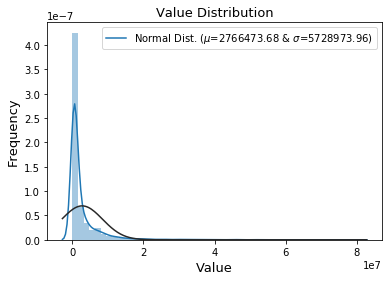

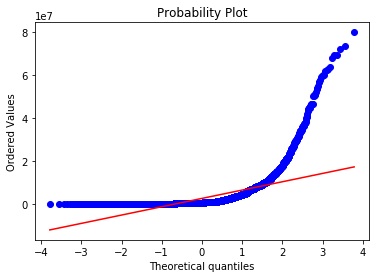

In [525]:
# Before : Value Skewnewss 
sns.distplot(train_df.value, fit=norm)

(mu, sigma) = norm.fit(train_df['value'])
print(mu, sigma)

plt.legend(['Normal Dist. ($\mu$={:.2f} & $\sigma$={:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency', fontSize=13)
plt.xlabel('Value', fontSize=13)
plt.title('Value Distribution', fontSize=13)

fig = plt.figure()
res = stats.probplot(train_df['value'], plot=plt)
plt.show()

13.793214059094066 1.4008150324034283


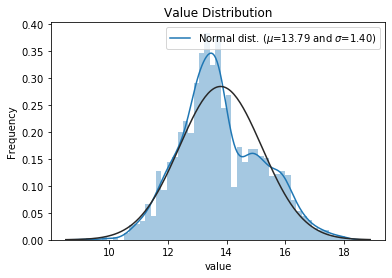

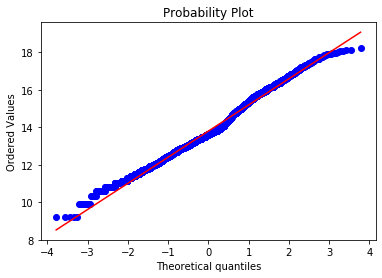

In [526]:
# After : Value Skewness
train_df['value'] = np.log1p(train_df['value'])

sns.distplot(train_df['value'], fit=norm)
(mu, sigma) = norm.fit(train_df['value'])

print(mu, sigma)

plt.legend(['Normal dist. ($\mu$={:.2f} and $\sigma$={:.2f})'.format(mu,sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Value Distribution')
fig = plt.figure()
res = stats.probplot(train_df['value'], plot=plt)

plt.show()

Text(0.5, 1.0, 'Value by Age')

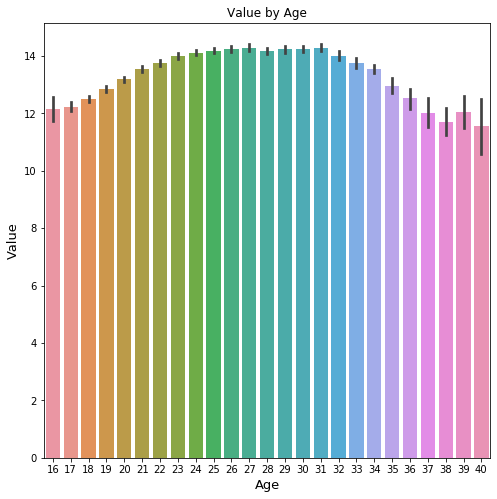

In [527]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.barplot(x=train_df['age'], y=train_df['value'])

plt.xlabel('Age', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.title('Value by Age')

In [528]:
train_df[['age', 'reputation', 'stat_potential']] = np.log1p(train_df[['age', 'reputation', 'stat_potential']])

In [529]:
test_df[['age', 'reputation', 'stat_potential']] = np.log1p(test_df[['age', 'reputation', 'stat_potential']])

In [530]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [531]:
y_train = train_df.value.values
train_df.drop('value', axis=1, inplace=True)

In [532]:
n_folds = 5 

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse = np.sqrt(-cross_val_score(model, train_df.values, y_train, scoring='neg_mean_squared_error', cv=kf))
    
    return rmse

In [533]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [534]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [535]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4,
                                   max_features='sqrt', min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state=5)

In [536]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [537]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [538]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.3125 (0.0659)



In [539]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.3126 (0.0660)



In [540]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.3107 (0.0891)



In [541]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4744 (0.2956)



In [542]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.4346 (0.3138)



In [543]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.4830 (0.2870)



In [544]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [545]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.2285 (0.0550)



In [546]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [547]:
stacked_averaged_models = StackingAveragedModels(
    base_models=(ENet, GBoost, KRR),
    meta_model=(lasso)
)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.4629 (0.2948)


In [548]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [549]:
print(test_df.shape)
print(train_df.shape)

(3828, 16)
(8930, 16)


In [550]:
train_df

,age,reputation,stat_overall,stat_potential,stat_skill_moves,contract_remain,continent_merge_africa,continent_merge_asia/oceania,continent_merge_europe,continent_merge_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
1,3.332205,1.609438,91,4.543295,1.0,2,0,0,1,0,0,1,0,0,0,1
2,3.465736,1.791759,91,4.521789,3.0,3,0,0,0,1,0,0,0,1,0,1
3,3.496508,1.609438,91,4.521789,3.0,2,0,0,1,0,1,0,0,0,0,1
4,3.258097,1.386294,90,4.543295,1.0,3,0,0,1,0,0,1,0,0,0,1
5,3.496508,1.386294,90,4.510860,2.0,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,2.944439,0.693147,48,4.158883,3.0,1,1,0,0,0,0,0,1,0,0,1
8928,2.995732,0.693147,47,4.094345,2.0,2,0,0,1,0,1,0,0,0,0,1
8929,2.944439,0.693147,47,4.174387,2.0,3,0,0,0,1,1,0,0,0,0,1
8930,2.944439,0.693147,47,4.189655,1.0,3,0,0,1,0,0,1,0,0,0,1


In [551]:
test_df

,age,reputation,stat_overall,stat_potential,stat_skill_moves,contract_remain,continent_merge_africa,continent_merge_asia/oceania,continent_merge_europe,continent_merge_south america,position_DF,position_GK,position_MF,position_ST,prefer_foot_left,prefer_foot_right
0,3.526361,1.791759,94,4.553877,5.0,4,0,0,1,0,0,0,0,1,0,1
1,3.295837,1.791759,92,4.543295,5.0,4,0,0,0,1,0,0,0,1,0,1
2,3.332205,1.609438,91,4.532599,4.0,5,0,0,1,0,0,0,1,0,0,1
3,3.332205,1.609438,91,4.521789,4.0,2,0,0,1,0,0,0,0,1,0,1
4,3.496508,1.609438,91,4.521789,4.0,2,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,3.044522,0.693147,48,4.158883,2.0,3,0,1,0,0,0,0,1,0,0,1
3824,2.944439,0.693147,48,4.189655,1.0,0,0,0,1,0,0,1,0,0,0,1
3825,2.944439,0.693147,48,4.189655,2.0,3,0,0,0,1,0,0,1,0,0,1
3826,2.944439,0.693147,47,4.127134,2.0,2,0,0,1,0,0,0,0,1,0,1


In [552]:
stacked_averaged_models.fit(train_df.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train_df.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test_df.values))
print(rmsle(y_train, stacked_train_pred))

0.05994911911110968


In [553]:
model_xgb.fit(train_df, y_train)
xgb_train_pred = model_xgb.predict(train_df)
xgb_pred = np.expm1(model_xgb.predict(test_df))
print(rmsle(y_train, xgb_train_pred))

0.07276047537357708


In [554]:
model_lgb.fit(train_df, y_train)
lgb_train_pred = model_lgb.predict(train_df)
lgb_pred = np.expm1(model_lgb.predict(test_df.values))
print(rmsle(y_train, lgb_train_pred))

0.1161734910320855


In [555]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.06186160321770853


In [556]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [557]:
ensemble

array([4.37104170e+07, 8.48230585e+07, 8.51360848e+07, ...,
       5.79430236e+04, 5.08073532e+04, 4.83642365e+04])

In [558]:
print(len(test_ID), len(ensemble))

3828 3828


In [559]:
sub = pd.DataFrame()
sub['id'] = test_ID
sub['value'] = ensemble
sub.to_csv('../submission/submission3.csv',index=False)